## Model Training

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import h5py


In [104]:
#  Import and read the charity_data.csv.
df = pd.read_csv("all_plays_features.csv")
df.head()

,play_uuid,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,...,week,cumulativeOverall_O,cumulativeOverall_D,cumulativeOverall_P,cumulativePerFormation_O,cumulativePerFormation_D,cumulativePerFormation_P,cumulativePerBoxCt_O,cumulativePerBoxCt_D,cumulativePerBoxCt_P
0,2.022091e+09,2022090800,101,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,...,1,0.500000,0.500000,0.0,0.000000,0.000000,0.0,0.500000,0.500000,0.0
1,2.022091e+09,2022090800,1030,52536,Gabe Davis,(11:44) (Shotgun) J.Allen pass short left to G...,2,3,2,BUF,...,1,0.444444,0.555556,0.5,0.363636,0.636364,0.0,0.000000,0.000000,0.0
2,2.022091e+09,2022090800,1102,52494,Zack Moss,"(9:37) (No Huddle, Shotgun) J.Allen pass short...",2,2,6,BUF,...,1,0.473684,0.526316,0.0,0.416667,0.583333,0.0,0.437500,0.562500,0.0
3,2.022091e+09,2022090800,1187,47853,Darrell Henderson,(8:48) D.Henderson right tackle to LA 44 for 4...,2,1,10,LAR,...,1,0.200000,0.800000,0.0,0.000000,1.000000,0.0,0.142857,0.857143,0.0
4,2.022091e+09,2022090800,122,47857,Devin Singletary,(13:15) (Shotgun) J.Allen pass short right to ...,1,2,3,BUF,...,1,0.333333,0.666667,0.0,0.000000,1.000000,0.0,0.333333,0.666667,0.0


In [97]:
df.columns

Index(['play_uuid', 'x0', 'y0', 's0', 'a0', 'dis0', 'o0', 'dir0', 'x1', 'y1',
       ...
       'yardsToGo', 'preSnapHomeScore', 'preSnapVisitorScore',
       'offenseFormation', 'defendersInTheBox',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'down'],
      dtype='object', length=184)

In [98]:
## Seperate the features, X,  from the target variable, y
# Keep meaningful features and target
#existing_features = ['quarter', 'yardsToGo','preSnapHomeScore',
#       'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox',
#        'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
#        'visitorTeamWinProbilityAdded', 'down']
#
#created_features = ['converted', 'playType', 'ballDirection', 'cumulativeOverall_O',
#        'cumulativeOverall_D', 'cumulativeOverall_P', 'cumulativePerFormation_O', 'cumulativePerFormation_D',
#        'cumulativePerFormation_P', 'cumulativePerBoxCt_O', 'cumulativePerBoxCt_D', 'cumulativePerBoxCt_P', 'week']


existing_features_to_keep = ['quarter', 'yardsToGo','preSnapHomeScore',
       'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'down']

created_features_to_keep = ['playType', 'ballDirection', 'cumulativeOverall_O',
        'cumulativeOverall_D', 'cumulativeOverall_P', 'cumulativePerFormation_O', 'cumulativePerFormation_D',
        'cumulativePerFormation_P', 'cumulativePerBoxCt_O', 'cumulativePerBoxCt_D', 'cumulativePerBoxCt_P', 'week']

existing_features_to_drop = ['quarter', 'yardsToGo','preSnapHomeScore',
       'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox',
        'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
        'visitorTeamWinProbilityAdded', 'down']

created_features_to_drop = ['playType', 'ballDirection', 'cumulativeOverall_O',
        'cumulativeOverall_D', 'cumulativeOverall_P', 'cumulativePerFormation_O', 'cumulativePerFormation_D',
        'cumulativePerFormation_P', 'cumulativePerBoxCt_O', 'cumulativePerBoxCt_D', 'cumulativePerBoxCt_P', 'week']

columns_to_keep = []
columns_to_keep = [col for col in df.columns if col not in ['converted', 'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability']]


y = df['converted']
#X = df[columns_to_keep] # when using frames
X = df[created_features_to_keep + existing_features_to_keep] # when not using frames
#X = df[created_features_to_keep]
#X = df[existing_features_to_keep]

In [105]:
X['homeTeamWinProbabilityAdded'].dtypes

dtype('float64')

In [31]:
# Determine the number of unique values in each column.
#X.nunique()

In [106]:
week_list = []
numberOfPlays_list = []
accuracy_list = []
loss_list = []

# Loop through by week, adding the week's data to the model
current_week = 1
last_week = 9

# Starting from week 1
while current_week <= last_week:

    X = df[df['week'] <= current_week]

    y = X['converted']

    X = X[created_features_to_keep + existing_features_to_keep] # when not using frames
    #X = X[columns_to_keep] # when using frames

    # Convert categorical data to numeric with `pd.get_dummies`
    X = pd.get_dummies(X)

    # Split the preprocessed data into a training and testing dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

    # Create a StandardScaler instances
    scaler = StandardScaler()

    # Fit the StandardScaler
    X_scaler = scaler.fit(X_train)

    # Scale the data
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
    number_input_features = len(X_train_scaled[0])
    hidden_nodes_layer1 = 12
    hidden_nodes_layer2 = 10
    hidden_nodes_layer3 = 8

    nn = tf.keras.models.Sequential()

    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
                 input_dim=number_input_features, activation="relu"))

    # Second hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

    # Third hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


    # Check the structure of the model
    nn.summary()

    # Compile the model
    nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

    print(f"Week {current_week} cumulative-data model results:")
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    print(f"Number of plays evaluated: {len(X)}")

    week_list.append(current_week)
    numberOfPlays_list.append(len(X))
    accuracy_list.append(model_accuracy)
    loss_list.append(model_loss)

#####################################################################

    current_week += 1
#total_plays = numberOfPlays     # the value from the last iteration
#
#results_table = pd.DataFrame({'week_number':week_list,
#                              'numberOfPlays':numberOfPlays_list,
#                              'loss':loss_list,
#                              'accuracy':accuracy_list})
#results_table['numberOfPlays_scaled'] = results_table[results_table['numberOfPlays'] /  total_plays]
#results_table

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_252 (Dense)           (None, 12)                384       
                                                                 
 dense_253 (Dense)           (None, 10)                130       
                                                                 
 dense_254 (Dense)           (None, 8)                 88        
                                                                 
 dense_255 (Dense)           (None, 1)                 9         
                                                                 
Total params: 611 (2.39 KB)
Trainable params: 611 (2.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
35/35 [==============================] - 1s 2ms/step - loss: 0.6627 - accuracy: 0.6259
Epoch 2/50
35/35 [==============================] - 0s 2m

In [107]:
total_plays = max(numberOfPlays_list)     # the value from the last iteration

results_table = pd.DataFrame({'week':week_list,
                              'numberOfPlays':numberOfPlays_list,
                              'loss':loss_list,
                              'accuracy':accuracy_list})
results_table['numberOfPlays_scaled'] = results_table['numberOfPlays'] / total_plays
results_table

,week,numberOfPlays,loss,accuracy,numberOfPlays_scaled
0,1,1472,0.485571,0.801630,0.117939
1,2,2886,0.542328,0.756233,0.231231
2,3,4358,0.476533,0.767890,0.349171
3,4,5793,0.463736,0.781919,0.464146
4,5,7288,0.477238,0.776619,0.583928
5,6,8574,0.466982,0.778918,0.686964
6,7,9890,0.458300,0.788516,0.792404
7,8,11302,0.463511,0.786624,0.905536
8,9,12481,0.459660,0.787568,1.000000


In [74]:
X.head()

,play_uuid,x0,y0,s0,a0,dis0,o0,dir0,x1,y1,...,ballDirection_middle,ballDirection_none,ballDirection_right,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_JUMBO,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT
0,2.022091e+09,73.13,27.67,0.10,1.14,0.02,273.97,348.75,67.35,29.96,...,0,0,1,0,1,0,0,0,0,0
1,2.022091e+09,71.72,29.54,0.05,0.85,0.01,272.46,55.53,69.25,24.99,...,0,0,1,0,0,0,0,0,1,0
2,2.022091e+09,59.81,23.63,0.00,0.00,0.00,272.98,143.12,42.18,36.75,...,0,0,0,0,0,0,1,0,0,0
3,2.022091e+09,36.64,29.50,0.08,0.88,0.01,273.91,130.33,34.44,33.93,...,0,0,0,0,0,0,0,0,1,0
4,2.022091e+09,18.65,23.35,0.25,1.67,0.02,278.66,52.44,16.13,28.06,...,1,0,0,0,0,0,0,0,1,0


In [14]:
#results_table.to_csv('all_plays_time_table.csv', index=False)

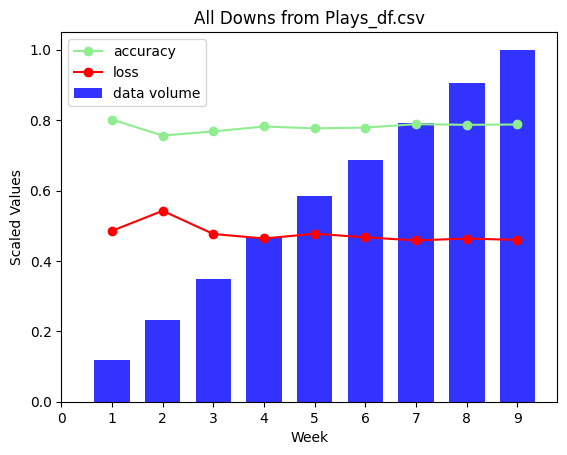

In [109]:
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots()
bar_width = 0.70
weeks = results_table['week']
bar_data = results_table['numberOfPlays_scaled']
y_1 = results_table['accuracy']
y_2 = results_table['loss']

# Plotting the bar chart
ax.bar(weeks, bar_data, bar_width, label='data volume', alpha=0.8, color='blue')

# Plotting the timeline
ax.plot(weeks, y_1, marker='o', color='lightgreen', label='accuracy')
ax.plot(weeks, y_2, marker='o', color='red', label='loss')

# Adding labels and title
ax.set_xlabel('Week')
ax.set_ylabel('Scaled Values')
ax.set_title('All Downs from Plays_df.csv')
ax.legend()

ax.set_xticks(range(len(results_table) + 1))

# Display the plot
plt.show()

In [17]:
plt.savefig('all_plays_time_chart.png')

<Figure size 640x480 with 0 Axes>

In [110]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

98/98 - 0s - loss: 0.4597 - accuracy: 0.7876 - 144ms/epoch - 1ms/step
Loss: 0.45966005325317383, Accuracy: 0.7875680923461914


In [111]:
# Export our model to HDF5 file

nn.save('all_downs_from_plays.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
